<a href="https://colab.research.google.com/github/tradeasystems/colab_test/blob/master/financial_derivatives_bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fixed Income module

https://www.udemy.com/course/financial-derivatives/



In [2]:
# must upload fixedincome.py from udemy course 
!wget https://raw.githubusercontent.com/tradeasystems/colab_test/master/fixedincome.py

--2020-03-28 17:30:56--  https://raw.githubusercontent.com/tradeasystems/colab_test/master/fixedincome.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36905 (36K) [text/plain]
Saving to: ‘fixedincome.py’

fixedincome.py      100%[===================>]  36.04K  --.-KB/s    in 0.009s  

2020-03-28 17:30:56 (4.10 MB/s) - ‘fixedincome.py’ saved [36905/36905]



In [0]:
import fixedincome as fi

## Bonds Exercises


https://www.udemy.com/course/financial-derivatives/learn/lecture/15082442#questions

#### Bond Example


In [4]:
#The payment dates must all be floating point numbers,
#bond factory
'''
bond making payments in 6 months, 1 year, and 18 months of $5, $5, and $105
'''
bond = fi.bond_factory(dates = [0.5, 1.0, 1.5], rates = [5, 5, 105])
bond

In [0]:
#Coupon bond
'''
This creates a bond object for a 5 year bond with a $1000 face value paying a 6%
coupon rate with semiannual payments.
'''
coupon_bond = fi.create_coupon_bond(maturity = 5, face = 1000, rate = 6, frequency = 2)

In [6]:
coupon_bond.get_dates()

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [7]:
coupon_bond.get_coupons()

[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 1030.0]

In [8]:
coupon_bond.get_price()

No price available


In [9]:
coupon_bond.set_price(75)
coupon_bond.get_price()

75

In [10]:
coupon_bond.YTM()#1-100



101.16673444556777

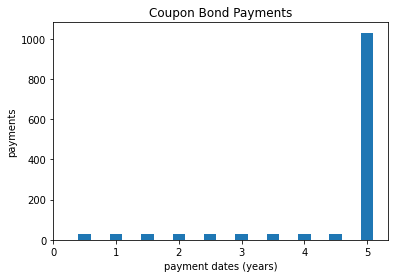

In [11]:
coupon_bond.plot_payments()

### 1: Try creating a bond object for a particular coupon bond.  For example, for a 3 year bond with a $10,000 face value paying a 7% coupon with semiannual payments



[0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
[350.00000000000006, 350.00000000000006, 350.00000000000006, 350.00000000000006, 350.00000000000006, 10350.0]


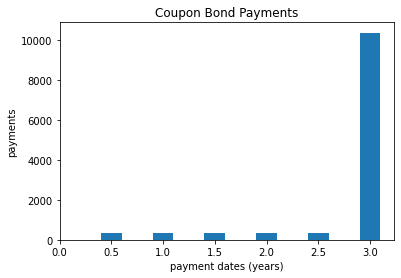

In [12]:
bond = fi.create_coupon_bond(maturity = 3, face = 10000, rate = 7, frequency = 2)
#check it
print(bond.get_dates())
print(bond.get_coupons())
bond.plot_payments()

### 2: The bond functionality in this module provides a laboratory for exploring the relationship between the prices and yields of bonds.  You can just create some coupon bonds and then compute the yield to maturity for different prices.  To get started, let's make a 10 year bond with a 9% coupon:


In [13]:
bond_1 = fi.create_coupon_bond(maturity = 10, face = 10000, rate = 9, frequency = 2)
#check it
print(bond.get_dates())
print(bond.get_coupons())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
[350.00000000000006, 350.00000000000006, 350.00000000000006, 350.00000000000006, 350.00000000000006, 10350.0]


In [14]:
bond_1.YTM(10000)

8.999999999999956

#### Study relationship price - yield


In [0]:
prices = [ i for i in range(8000,13000,500)]
yields = [bond_1.YTM(price) for price in prices]

In [16]:
import pandas as pd
df = pd.DataFrame(columns=['price','yield'])
df['price']=prices
df['yield'] = yields
df.head()

,price,yield
0,8000,12.568248
1,8500,11.570079
2,9000,10.649325
3,9500,9.795483
4,10000,9.000000


Text(0.5, 1.0, 'relationship price - yield')

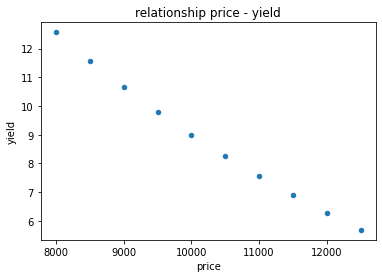

In [17]:
import matplotlib.pyplot as plt

df.plot.scatter(x='price',y='yield')
plt.title('relationship price - yield')

In [18]:
#DV01
# DV01 or Dollar Value of 1 basis point measures the interest rate risk of bond
#  or portfolio of bonds by estimating the price change in dollar terms in
#  response to change in yield by a single basis point
# https://www.wallstreetmojo.com/dv01/

#DV01 = -(delta yield)/[(delta price)*10000]
price_1 = 100
yield_1 = bond_1.YTM(price=price_1)
price_2 = 80
yield_2 = bond_1.YTM(price=price_2)

dv01 = -(yield_2-yield_1)/((price_2-price_1)*10000)
print('A movement of 1bps(0.01 pct) up in the yield will move down the price %.4f points'%dv01)
print('A movement of 1 figure(1 pct) up in the yield will move down the price %.4f points'%(dv01*1000))

A movement of 1bps(0.01 pct) up in the yield will move down the price 0.0011 points
A movement of 1 figure(1 pct) up in the yield will move down the price 1.1250 points


## Yield Curves I

https://www.udemy.com/course/financial-derivatives/learn/lecture/15083416#questions


yield_curve = fi.curve_factory(dates, rates)
* dates is assumed to be a list of tenors specified by year fractions , must be entered as percentages assumed
* spot rates are assumed to be continuously compounded

Yhe curve is can be  built:
1. hermite: Hermite interpolation,based on the Catmull-Rom procedure
2. natural: cubic splines with natural boundary conditions
3. pwlinear **[default]** : piecewise linear interpolation



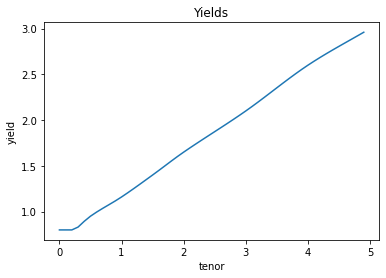

In [19]:
#curve object implementing a yield curve with a 
#0.8% spot rate at the 3 month tenor, a 0.95% spot rate at the 6 month tenor,
# a 1.16% spot rate at the 1 year tenor

tenors = [0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]
spot_rates = [0.8, 0.95, 1.16, 1.4, 1.65, 2.1, 2.6, 3.0]
# yield_curve = fi.curve_factory(dates = tenors, rates = spot_rates)
yield_curve = fi.curve_factory(dates = tenors, rates = spot_rates, method="hermite")
yield_curve.plot_yields()

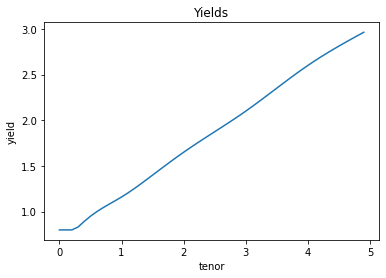

In [20]:
yield_curve = fi.curve_factory(dates = tenors, rates = spot_rates, method="natural")
yield_curve.plot_yields()


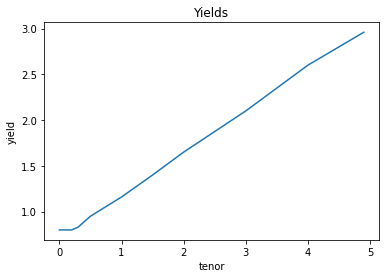

rates:[0.8, 0.95, 1.16, 1.4, 1.6500000000000001, 2.1, 2.6, 3.0]
tenors:[0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]


In [21]:
yield_curve = fi.curve_factory(dates = tenors, rates = spot_rates, method="pwlinear")
yield_curve.plot_yields()
# The rates returned by both the get_rates and get_yield methods are continuously compounded.
print("rates:%s"%yield_curve.get_rates())
print("tenors:%s"%yield_curve.get_tenors())

In [22]:
time=0.35#time has to be a float number of a year-> 0.5 means 6Months
yield_curve.get_yield(time)#The rates returned by both the get_rates and get_yield methods are continuously compounded.

0.86

In [23]:
# The yield curve object can also return spot rates with arbitrary compounding 
# convention using the spot_rate method
compounding=2
time=0.5
# The rates returned by both the get_rates and get_yield methods are continuously compounded.
yield_curve.spot_rate(time,compounding=compounding)

0.9522598266420879

In [24]:
yield_curve.discount_factor(time)

0.9952612634092118

In [0]:
#  to return the semiannually compounded spot interest rate corresponding to a 5 year loan term, make the call
interest_rate = yield_curve.spot_rate(5.0, compounding=2)
#  return a simply compounded rate, the call is
interest_rate = yield_curve.spot_rate(5.0, compounding=0)

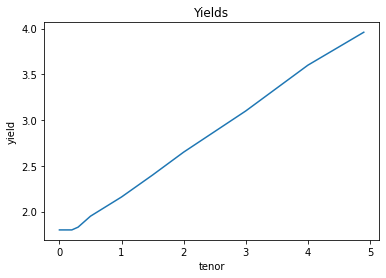

rates:[1.8000000000000003, 1.95, 2.16, 2.4, 2.6500000000000004, 3.1, 3.6000000000000005, 4.0]
tenors:[0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]


In [26]:
# curve class includes a utility function for carrying out a parallel shift of the curve
# shift in percentage terms, the internally stored continuously compounded rates will be shifted by the given amount
yield_curve2 = yield_curve.shift(1.0)
yield_curve2.plot_yields()
# The rates returned by both the get_rates and get_yield methods are continuously compounded.
print("rates:%s"%yield_curve2.get_rates())#all the rates have been increased by 1 percentage point
print("tenors:%s"%yield_curve2.get_tenors())

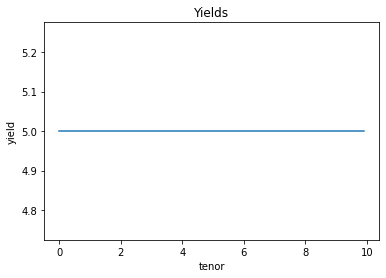

rates:[5.0]
tenors:[10.0]


In [27]:
#yield curve function , one value
yc = fi.curve_factory(dates = [10.0], rates = [5.0], method="pwlinear")

yc.plot_yields()
# The rates returned by both the get_rates and get_yield methods are continuously compounded.
print("rates:%s"%yc.get_rates())#all the rates have been increased by 1 percentage point
print("tenors:%s"%yc.get_tenors())

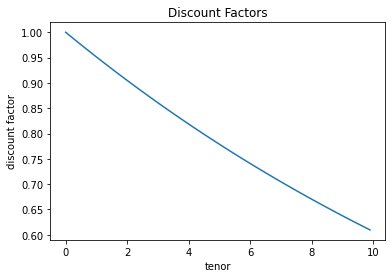

In [28]:
yc.plot_discount_factors()

In [30]:
bond5 = fi.create_coupon_bond(maturity = 5, face = 10000, rate = 5, frequency = 2)
# Is this result what you expect? 
bond5.price(yc)

# the compounding convention implicit in our construction of a yield curve is continous compounding

9972.465304609344

In [32]:
bond6 = fi.create_coupon_bond(maturity = 5, face = 10000, rate = 5, frequency = 1)
# Is this result what you expect? 
bond6.price(yc)

# the compounding convention implicit in our construction of a yield curve is continous compounding

9945.161008269608